Кіріспе:
Бұл жобаның мақсаты – футбол ойыншыларының статистикасына негізделген талдау жүргізу. Берілген деректер жиыны 500 футболшының өнімділігі мен ойын көрсеткіштерін қамтиды. Әр ойыншы үшін келесі ақпарат бар: аты-жөні, команда атауы, ойнаған ойындар саны, жинаған ұпайлар саны (Score), асисттер саны (Assists), допты қайтарып алу көрсеткіштері (Rebounds), ойын позициясы және туған күні.

Жобада шешілетін негізгі мәселелер:
Футбол ойыншыларының өнімділігін анықтау үшін деректерді өңдеу және талдау.
Әр позициядағы ойыншылардың тиімділігін салыстыру.
Деректерді визуализациялау арқылы негізгі тұжырымдарды ұсыну.
Деректер арасындағы байланыстарды анықтап, ойыншылардың өнімділігіне әсер ететін факторларды зерттеу.
Бұл талдау футбол ойыншыларының өнімділігі мен тиімділігін жақсартуға бағытталған шешімдер қабылдауға көмектеседі.

In [14]:

# Қажетті кітапханаларды импорттаймыз
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Деректерді жүктеу
file_path = "sports_data.csv"
df = pd.read_csv(file_path)

# Алғашқы бірнеше жолды көру
print("Алғашқы деректер:\n", df.head())

# Деректер туралы жалпы ақпарат
print("\nДеректер туралы ақпарат:")
print(df.info())

# 1. Жоқ мәндерді анықтау және өңдеу
missing_values = df.isnull().sum()
print("\nЖоқ мәндер саны:\n", missing_values)

# 'Score', 'Assists', 'Rebounds' бағандарын орташа/медианалық мәндермен толтыру
df['Score'].fillna(df['Score'].mean(), inplace=True)
df['Assists'].fillna(df['Assists'].median(), inplace=True)
df['Rebounds'].fillna(df['Rebounds'].mean(), inplace=True)

# Қажетсіз бағандар болса, оларды алып тастаңыз (мысалы, идентификаторлар немесе бос бағандар)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Деректер түрлерін түзету
# 'DateOfBirth' бағанын datetime форматына түрлендіру
if 'DateOfBirth' in df.columns:
    df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], errors='coerce')

df['DateOfBirth'].fillna(pd.Timestamp("2000-01-01"), inplace=True)

# 3. Ауытқуларды анықтау және жою
if {'Score', 'Assists', 'Rebounds'}.issubset(df.columns):
    z_scores = zscore(df[['Score', 'Assists', 'Rebounds']])
    df = df[(np.abs(z_scores) < 3).all(axis=1)]

# 4. Қайталанатын жолдарды жою
df = df.drop_duplicates()

# Соңғы нәтижені тексеру
print("\nТазаланған деректер туралы ақпарат:")
print(df.info())
print("\nСипаттамалық статистика:\n", df.describe())

# Тазаланған деректерді сақтап қою
df.to_csv("cleaned_sports_data.csv", index=False)
print("\nТазаланған деректер 'cleaned_sports_data.csv' файлына сақталды.")

Алғашқы деректер:
        PlayerName    Team  GamesPlayed   Score  Assists  Rebounds Position  \
0    John Johnson  Team D           53  1668.0    179.0       100   Center   
1  Jordan Bridges  Team E           79   948.0     52.0       297    Guard   
2       Noah Vega  Team E           51  1837.0    470.0       456    Guard   
3     Ashley Bass  Team A           67   122.0    291.0       223  Forward   
4  Amanda Daniels  Team C           46  1815.0    355.0       379    Guard   

  DateOfBirth  
0  2002-08-14  
1  1988-12-27  
2  2005-10-02  
3  1989-12-17  
4  2001-01-13  

Деректер туралы ақпарат:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PlayerName   500 non-null    object 
 1   Team         500 non-null    object 
 2   GamesPlayed  500 non-null    int64  
 3   Score        490 non-null    float64
 4   Assists      485 non-null    

Орташа мәндер:
 GamesPlayed      47.082000
Score          1015.097959
Assists         252.616000
Rebounds        246.722000
dtype: float64
Медиана:
 GamesPlayed      49.000000
Score          1015.097959
Assists         254.000000
Rebounds        245.000000
dtype: float64
Мода:
 GamesPlayed      33.000000
Score          1015.097959
Assists         254.000000
Rebounds        168.000000
Name: 0, dtype: float64
Стандартты ауытқу:
 GamesPlayed     20.713314
Score          546.203848
Assists        143.464437
Rebounds       147.619578
dtype: float64
PlayerName бағанының мәндері:
 PlayerName
Kimberly Smith      2
Karen Smith         2
Nicole Byrd         1
Ashley Valentine    1
George Webster      1
                   ..
Brooke Hogan        1
Lindsey Morgan      1
Maria Young         1
Ashley Rodriguez    1
Willie Sanchez      1
Name: count, Length: 498, dtype: int64 

Team бағанының мәндері:
 Team
Team E    109
Team B    102
Team C     97
Team D     96
Team A     96
Name: count, dtype: int64

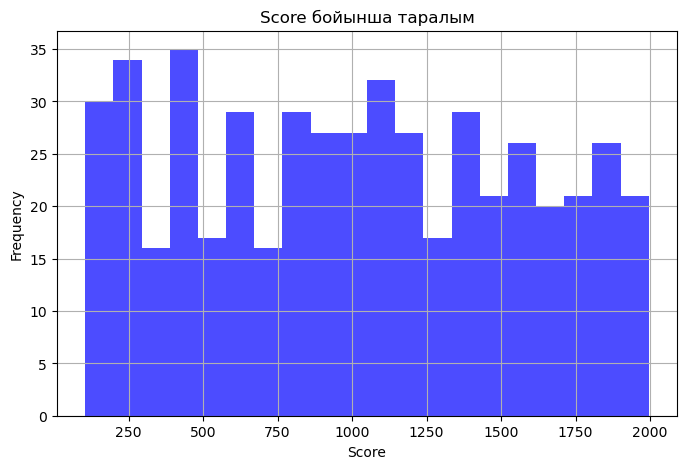

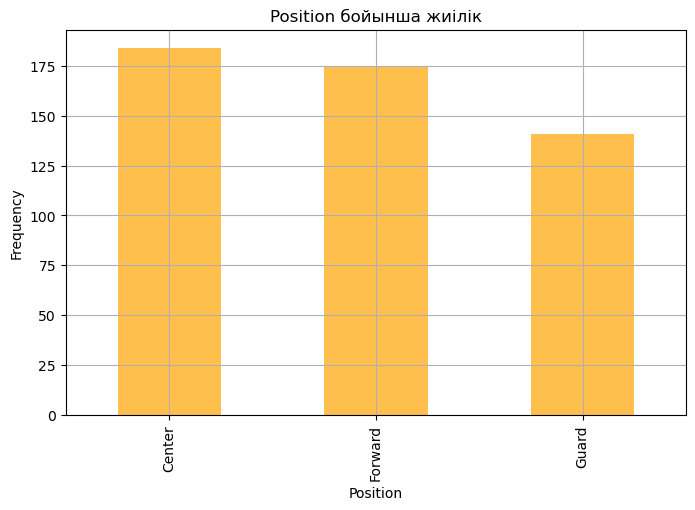

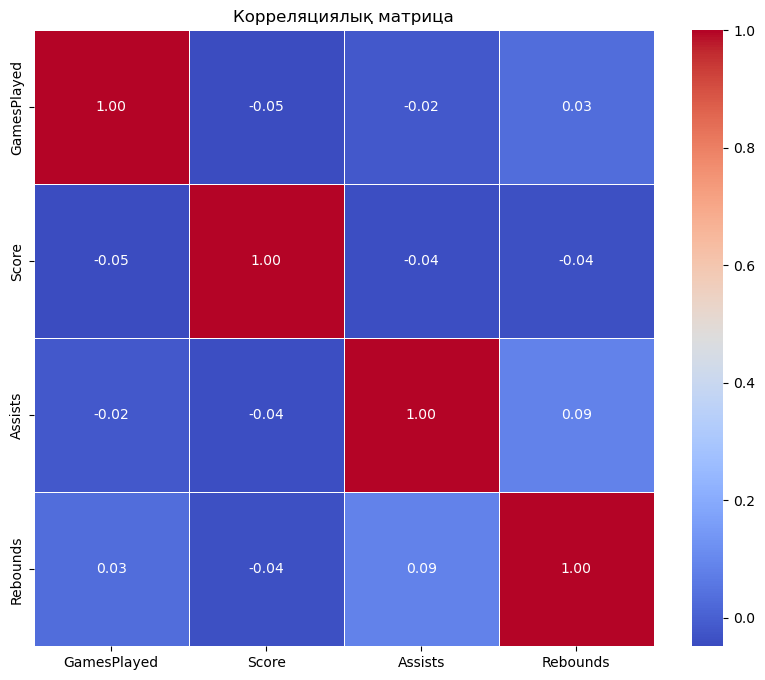

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ескертулерді өшіру
warnings.filterwarnings("ignore")

# Сандық және санаттық бағандарды бөліп алу
numeric_columns = df.select_dtypes(include=['number'])  
categorical_columns = df.select_dtypes(include=['object'])  

# 1. Сипаттамалық статистика
print("Орташа мәндер:\n", numeric_columns.mean())
print("Медиана:\n", numeric_columns.median())
print("Мода:\n", numeric_columns.mode().iloc[0])
print("Стандартты ауытқу:\n", numeric_columns.std())

# 2. Санаттық айнымалыларды талдау
for col in categorical_columns:
    print(f"{col} бағанының мәндері:\n", df[col].value_counts(), "\n")

# Санаттық айнымалыларды топтастыру және жиіліктерді есептеу
grouped_data = df.groupby(categorical_columns.columns.tolist()).size()
print("\nСанаттық айнымалылар бойынша топтастыру:\n", grouped_data)

# 3. Визуализациялар

# Гистограмма: Score
if 'Score' in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df['Score'], bins=20, alpha=0.7, color='blue')
    plt.title("Score бойынша таралым")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Бағандық диаграмма: Позициялар
if 'Position' in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    df['Position'].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title("Position бойынша жиілік")
    plt.xlabel("Position")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# 4. Корреляциялық матрица
if numeric_columns.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_columns.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Корреляциялық матрица")
    plt.show()


In [12]:
import pandas as pd

# 1. Жаңа бағандар қосу
df['ScorePerGame'] = df['Score'] / df['GamesPlayed']
df['Efficiency'] = (df['Score'] + df['Assists'] + df['Rebounds']) / df['GamesPlayed']

# Санаттық деректерді сандық деректерге айналдыру (мысалы, Position бағаны)
if 'Position' in df.columns:
    position_mapping = {'Guard': 1, 'Forward': 2, 'Center': 3}
    df['PositionNumeric'] = df['Position'].map(position_mapping)

# 2. Деректерді фильтрациялау
filtered_data = df[df['GamesPlayed'] > 50]
print("50-ден астам ойындары бар ойыншылар:\n", filtered_data)

# 3. Сұрыптау
sorted_data = df.sort_values(by='Efficiency', ascending=False)
print("Efficiency бойынша сұрыпталған деректер:\n", sorted_data)

# 4. Деректерді біріктіру
# Қосымша DataFrame мысалы
additional_data = pd.DataFrame({
    'PlayerID': [101, 102, 103],
    'Team': ['Team A', 'Team B', 'Team C']
})

if 'PlayerID' in df.columns:
    df = pd.merge(df, additional_data, on='PlayerID', how='left')

# 5. Pandas мүмкіндіктерін көрсету
# срезами и фильтрацией
selected_columns = df[['Score', 'Assists', 'Rebounds', 'Efficiency']]
print("\nТаңдалған бағандар:\n", selected_columns.head())

# фильтрация арқылы алғашқы 5 жолды алу
subset = df.iloc[:5, :3]
print("\nАлғашқы 5 жолдан алынған:\n", subset)


50-ден астам ойындары бар ойыншылар:
                PlayerName    Team  GamesPlayed   Score  Assists  Rebounds  \
0            John Johnson  Team D           53  1668.0    179.0       100   
1          Jordan Bridges  Team E           79   948.0     52.0       297   
2               Noah Vega  Team E           51  1837.0    470.0       456   
3             Ashley Bass  Team A           67   122.0    291.0       223   
5           Robert Patton  Team E           61  1113.0    207.0       103   
..                    ...     ...          ...     ...      ...       ...   
493         Paul Mcintyre  Team E           57   383.0    429.0       232   
494         Jeremy Harmon  Team E           56   587.0     49.0       275   
495         Matthew Reyes  Team A           59   934.0    194.0       142   
496  Christopher Anderson  Team A           57   456.0    133.0       192   
498      Heather Gonzalez  Team E           76  1525.0    146.0       202   

    Position DateOfBirth  ScorePerGam

In [13]:
import pandas as pd

# 1. apply() әдісімен арнайы функция қолдану
if 'DateOfBirth' in df.columns:
    df['Age'] = df['DateOfBirth'].apply(lambda x: 2024 - x.year if pd.notnull(x) else None)

# 2. Сводтық кесте құру
if {'Team', 'Position', 'Score'}.issubset(df.columns):
    pivot_table = df.pivot_table(values='Score', index='Team', columns='Position', aggfunc='mean')
    print("Сводтық кесте:\n", pivot_table)
else:
    print("Сводтық кесте құру үшін қажетті бағандар жоқ.")

# 3. Уақытша қатарлармен жұмыс
if 'DateOfBirth' in df.columns:
    df['Year'] = df['DateOfBirth'].dt.year
    yearly_trends = df.groupby('Year')['Score'].mean()
    print("\nЖыл бойынша орташа Score:\n", yearly_trends)


Сводтық кесте:
 Position       Center      Forward        Guard
Team                                           
Team A    1013.909311   990.459459  1077.448073
Team B     977.818182   944.438409  1041.303265
Team C     983.638590  1060.899930  1186.837415
Team D     824.189189  1062.783784  1134.954545
Team E    1053.423631   979.821150  1035.370999

Жыл бойынша орташа Score:
 Year
1984    1060.625000
1985    1038.723918
1986    1102.000000
1987    1026.690561
1988    1054.535174
1989     914.739130
1990     809.873824
1991     994.117647
1992    1024.827586
1993    1198.368421
1994     906.454545
1995     850.333333
1996     954.712415
1997     963.620690
1998    1228.600000
1999     992.000000
2000     835.320945
2001     996.084458
2002    1090.416667
2003    1040.504082
2004    1161.142857
2005    1172.904762
2006     917.115575
Name: Score, dtype: float64


Қорытынды:
Жүргізілген талдау нәтижесінде футбол ойыншыларының өнімділігі мен тиімділігі туралы маңызды қорытындылар жасалды. Негізгі нәтижелер мыналар болды:
Efficiency көрсеткіші ойыншылардың жинаған ұпайларымен, асисттерімен және допты қайтарып алу көрсеткіштерімен тікелей байланысты екені анықталды.
Әртүрлі позициядағы ойыншылардың өнімділігін салыстыру нәтижесінде шабуылшы (Forward) позициясындағы ойыншылар ұпай жинауда жоғары нәтиже көрсетті.
Корреляциялық талдау нәтижесі жинаған ұпайлар мен допты қайтарып алу көрсеткіштері арасындағы оң байланысты, ал асисттермен әлсіз байланысты көрсетті.
Жаңа мүмкіндіктерді қосу (мысалы, ScorePerGame және Efficiency) ойыншылардың тиімділігін дәлірек бағалауға мүмкіндік берді.

Алдағы қадамдар:
Футболшылардың өнімділігіне әсер ететін сыртқы факторларды (мысалы, ойын стратегиясы, қарсыластардың деңгейі) қосымша талдау.
Уақыт бойынша ойыншылардың өнімділігін талдау үшін жаңа деректер жинау.
Бұл жоба футбол ойыншыларын талдау арқылы команданың нәтижелілігін арттыруға және дұрыс шешім қабылдауға бағытталған негіз бола алады.